In [1]:
# Loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
import missingno as msno


import gc
# enable garbage collector to aid in memory 
gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading data file and printing the data
tourism_df = pd.read_excel("Tourism.xlsx", "Tourism")
tourism_df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
# Printing information of dataset
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### EDA of dataset

In [4]:
# Getting the summary of tourism dataframe
tourism_df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


0    3968
1     920
Name: ProdTaken, dtype: int64


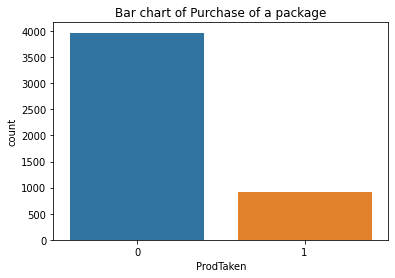

In [5]:
# Analysis and visualization of prod taken 
tb = tourism_df['ProdTaken'].value_counts()
print(tb)
ax = sns.countplot(x = 'ProdTaken',  data=tourism_df)
ax.set_title('Bar chart of Purchase of a package')
plt.show()

The current customer's purchased packaged status is shown in the table. 920 out of 3968 (around 20%) people has purchased the newly introduced travel package from the sample.

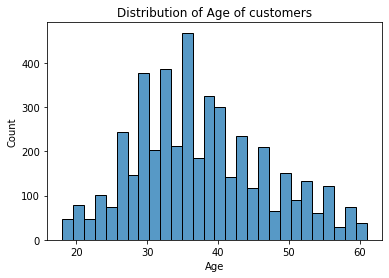

In [6]:
# Analysis and visualization of Age
ax = sns.histplot(x = 'Age',  data=tourism_df)
ax.set_title('Distribution of Age of customers')
plt.show()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64


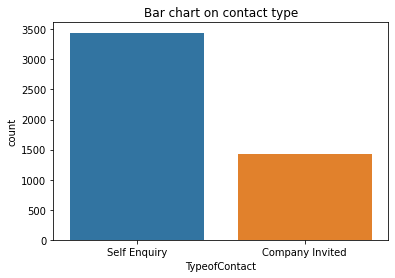

In [7]:
# Analysis and visualization of Contact Type 
tb = tourism_df['TypeofContact'].value_counts()
print(tb)
ax = sns.countplot(x = 'TypeofContact',  data=tourism_df)
ax.set_title('Bar chart on contact type')
plt.show()

1    3190
3    1500
2     198
Name: CityTier, dtype: int64


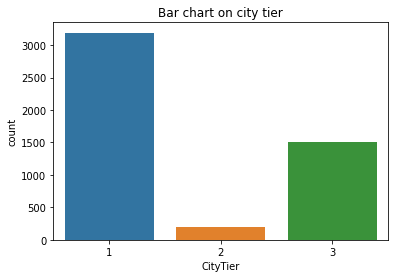

In [8]:
# Analysis and visualization of CityTier
tb = tourism_df['CityTier'].value_counts()
print(tb)
ax = sns.countplot(x = 'CityTier',  data=tourism_df)
ax.set_title('Bar chart on city tier')
plt.show()

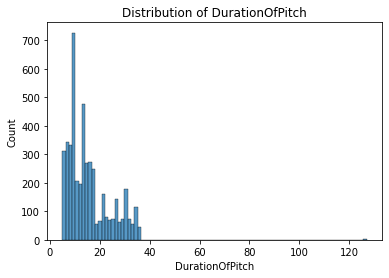

In [9]:
# Analysis and visualization of Pitch duration
ax = sns.histplot(x = 'DurationOfPitch',  data=tourism_df)
ax.set_title('Distribution of DurationOfPitch')
plt.show()

The sale pitching score seems to lie between 2 to 3.5 for most of the customers. 

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64


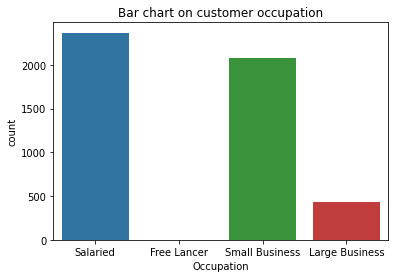

In [10]:
# Analysis and visualization of Occupation
tb = tourism_df['Occupation'].value_counts()
print(tb)
ax = sns.countplot(x = 'Occupation',  data=tourism_df)
ax.set_title('Bar chart on customer occupation')
plt.show()

Most of the customers are salaried or small business owner. We should target such kind of population for travel package sale.

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


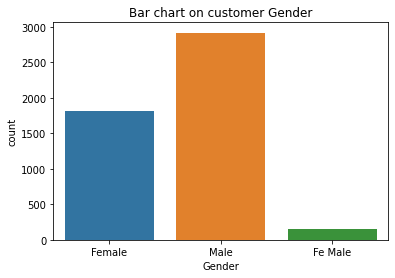

In [11]:
# Analysis and visualization of Gender
tb = tourism_df['Gender'].value_counts()
print(tb)
ax = sns.countplot(x = 'Gender',  data=tourism_df)
ax.set_title('Bar chart on customer Gender')
plt.show()

The above table and bar chart shows the data issue with female population. We need to fix it and then do the analysis again.

Male      2916
Female    1972
Name: Gender, dtype: int64


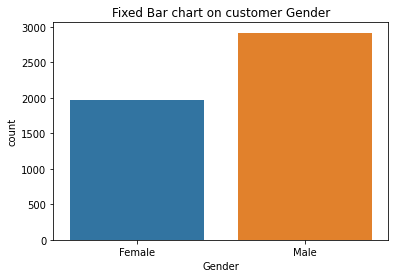

In [12]:
# Fixing gender data issue
tourism_df["Gender"].replace({"Fe Male": "Female"}, inplace=True)

# Analysis and visualization of Gender
tb = tourism_df['Gender'].value_counts()
print(tb)
ax = sns.countplot(x = 'Gender',  data=tourism_df)
ax.set_title('Fixed Bar chart on customer Gender')
plt.show()

3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64


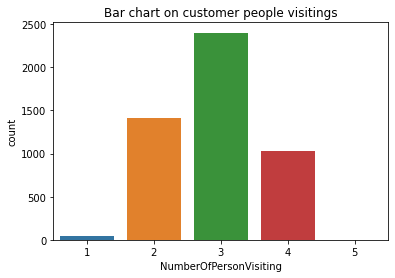

In [13]:
# Analysis and visualization of people visitings
tb = tourism_df['NumberOfPersonVisiting'].value_counts()
print(tb)
ax = sns.countplot(x = 'NumberOfPersonVisiting',  data=tourism_df)
ax.set_title('Bar chart on customer people visitings')
plt.show()

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64


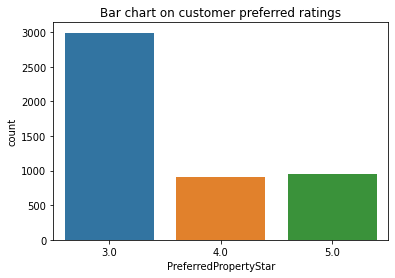

In [14]:
# Analysis and visualization of Preferred hotel property rating by customer
tb = tourism_df['PreferredPropertyStar'].value_counts()
print(tb)
ax = sns.countplot(x = 'PreferredPropertyStar',  data=tourism_df)
ax.set_title('Bar chart on customer preferred ratings')
plt.show()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


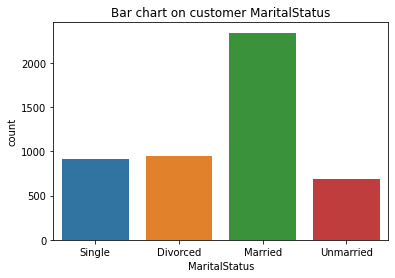

In [15]:
# Analysis and visualization of customer marital status
tb = tourism_df['MaritalStatus'].value_counts()
print(tb)
ax = sns.countplot(x = 'MaritalStatus',  data=tourism_df)
ax.set_title('Bar chart on customer MaritalStatus')
plt.show()

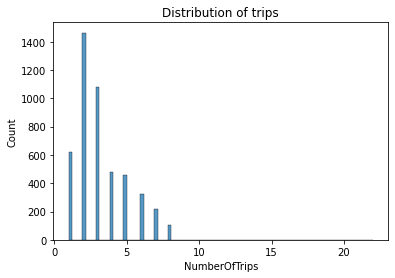

In [16]:
# Analysis and visualization of Average number of trips in a year by customer
ax = sns.histplot(x = 'NumberOfTrips',  data=tourism_df)
ax.set_title('Distribution of trips')
plt.show()

On average, customers have taken 2 to 6 trips per year.

0    3466
1    1422
Name: Passport, dtype: int64


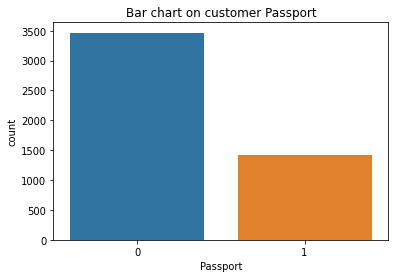

In [17]:
# Analysis and visualization of Passport
tb = tourism_df['Passport'].value_counts()
print(tb)
ax = sns.countplot(x = 'Passport',  data=tourism_df)
ax.set_title('Bar chart on customer Passport')
plt.show()

1    3032
0    1856
Name: OwnCar, dtype: int64


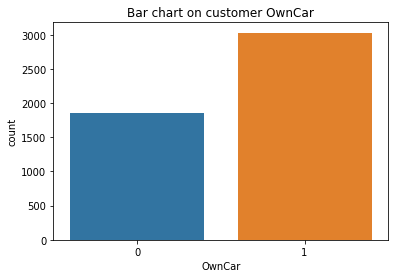

In [18]:
# Analysis and visualization of OwnCar
tb = tourism_df['OwnCar'].value_counts()
print(tb)
ax = sns.countplot(x = 'OwnCar',  data=tourism_df)
ax.set_title('Bar chart on customer OwnCar')
plt.show()

1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisiting, dtype: int64


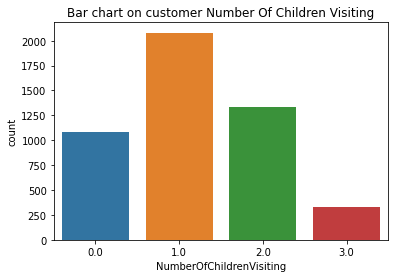

In [19]:
# Analysis and visualization of number of children planning to take the trip with the customer

tb = tourism_df['NumberOfChildrenVisiting'].value_counts()
print(tb)
ax = sns.countplot(x = 'NumberOfChildrenVisiting',  data=tourism_df)
ax.set_title('Bar chart on customer Number Of Children Visiting')
plt.show()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


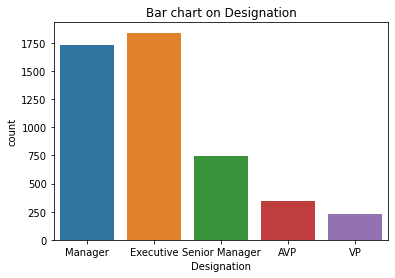

In [20]:
# Analysis and visualization of designation
tb = tourism_df['Designation'].value_counts()
print(tb)
ax = sns.countplot(x = 'Designation',  data=tourism_df)
ax.set_title('Bar chart on Designation')
plt.show()

Managers and Executives shows most interest in the product.

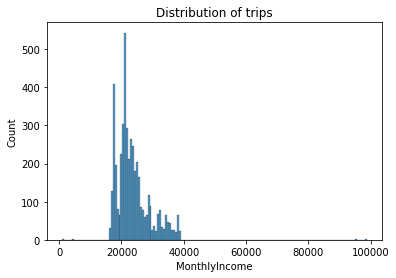

In [21]:
# Analysis and visualization of customer's gross monthly income
ax = sns.histplot(x = 'MonthlyIncome',  data=tourism_df)
ax.set_title('Distribution of trips')
plt.show()

People in the sample data are earning from 20k to 40k dollars per month. We can use this to strategizing our product pricing.

##### Bivariate Analysis

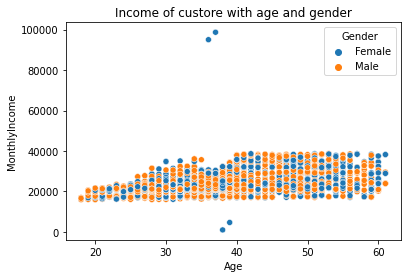

In [22]:
# Scatterplot of age vs monthly income of customer coloured with gender
ax=sns.scatterplot(x='Age', y='MonthlyIncome', hue='Gender', data=tourism_df)
ax.set_title("Income of custore with age and gender")
plt.show()

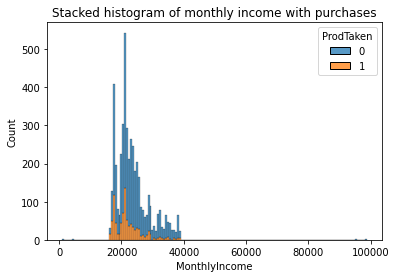

In [23]:
# Visualization of monthly income with purchases
ax = sns.histplot(x = 'MonthlyIncome', hue='ProdTaken', data=tourism_df, multiple="stack")
ax.set_title('Stacked histogram of monthly income with purchases')
plt.show()


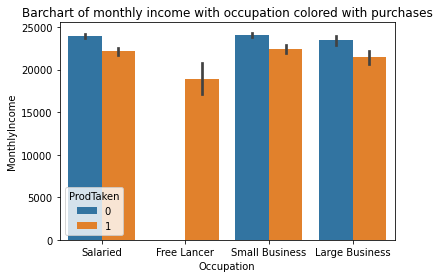

In [24]:
# Visualization of monthly income with purchases
ax = sns.barplot(x = 'Occupation', y = 'MonthlyIncome', hue='ProdTaken', data=tourism_df)
ax.set_title('Barchart of monthly income with occupation colored with purchases')
plt.show()

### Data Pre-processing

##### Outliers handling from the dataframe

In [25]:
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

One of the method to handle outliers in numeric data is log-transformation of the particular column. It results in zero data loss (we have only 5k rows). 

From the above ananlysis and visualizations, we can see that DurationOfPitch and MonthlyIncome columns have outliers, which needs treatment before modelling.

##### Performing log transformation on columns

In [26]:
# Performing log transformation on the mentioned columns
tourism_df['DurationOfPitch'] = np.log(tourism_df['DurationOfPitch'])
tourism_df['MonthlyIncome'] = np.log(tourism_df['MonthlyIncome'])

##### Missing value treatment 

In [27]:
# Checking missing values in dataframe
tourism_df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

<AxesSubplot:>

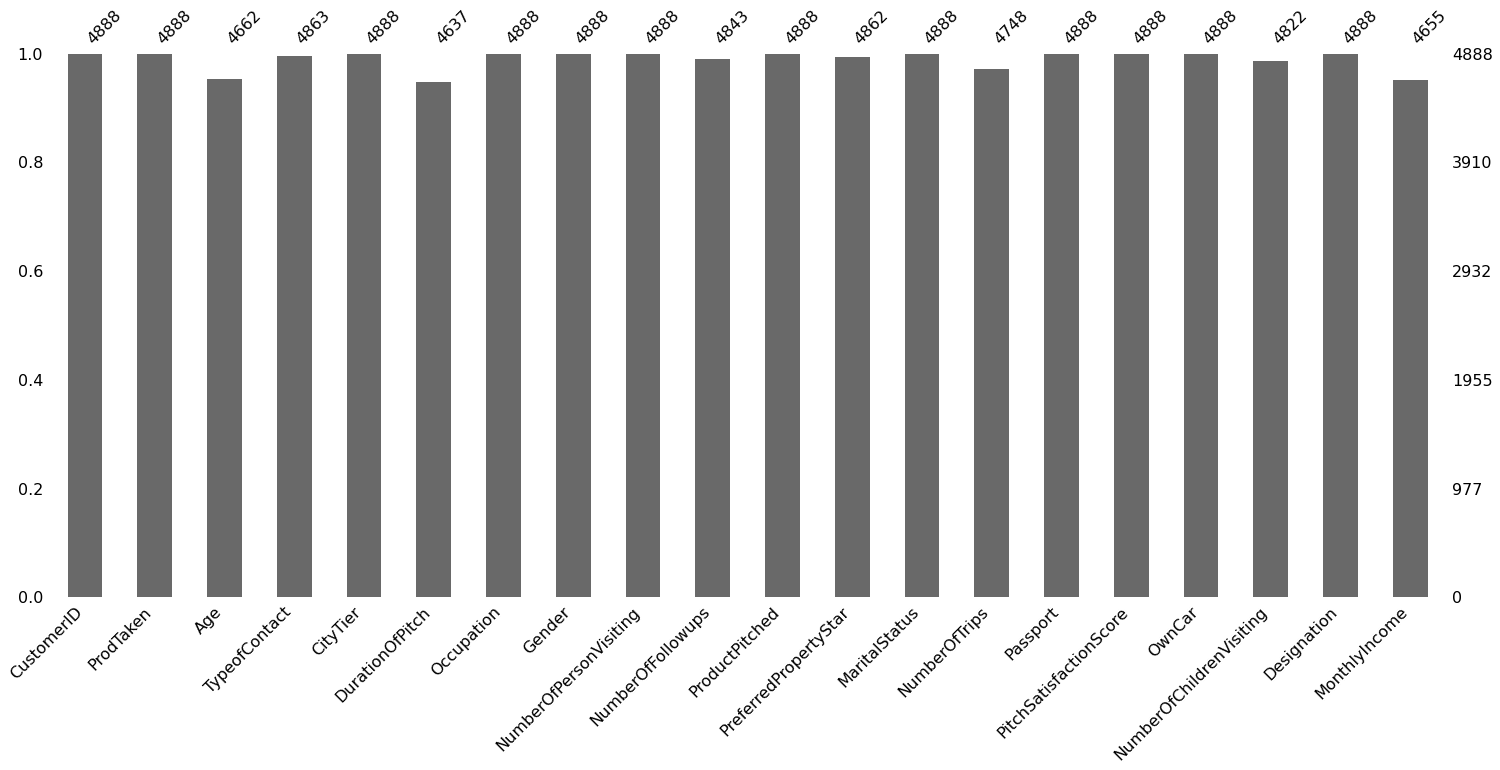

In [28]:
# Missing value plot for tourism dataset
msno.bar(tourism_df)

From the missing value plot visualization we can see that multiple columns have missing values. We need to impute these missing values before modeling. One of the imputation strategy is imputing missing values with their respective column median, which we will use here.

In [29]:
# Numeric missing values column
missing_col = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 
               'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']

for i in missing_col:
    tourism_df.loc[tourism_df.loc[:,i].isnull(),i]=tourism_df.loc[:,i].median()
    
# Categorical missing values column replacing with mode of the column
tourism_df = tourism_df.fillna(tourism_df['TypeofContact'].value_counts().index[0])

In [30]:
# Checking missing values in dataframe after imputation
tourism_df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

##### Categorical features encoding

Since all the categorical features in the datasets are Nominal, we need to do dummy encoding before applying machine learning

In [31]:
# Performing dummy encoding of categorical features
tourism_df=pd.get_dummies(data=tourism_df,drop_first=True)

### Model building

##### Train Test split of dataset

In [32]:
# Splitting the dataset into training and testing
y_feature = tourism_df['ProdTaken']
x_features = tourism_df.drop(['CustomerID','ProdTaken'], axis=1) # Dropping ID before modelling
features = np.array(x_features.columns)

X_train, X_test, y_train, y_test = train_test_split(x_features, y_feature, test_size=0.2, random_state=1)

In [33]:
# Traing sample y distribution
y_train.value_counts()

0    3185
1     725
Name: ProdTaken, dtype: int64

Since the data has more zeros than one (80%, 20% ratio), Recall and f1-score would be a better perfromance evaluation matrix than accuracy and precision.

##### Model building - Bagging

In [34]:
# instantiate the decision classifier 
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree model f1-score on test set: {0:0.3f}'. format(f1_score(y_test, y_pred)))

# instantiate the rf classifier 
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Random Forest model f1-score with 10 decision-trees on test set: {0:0.3f}'. format(f1_score(y_test, y_pred)))

# instantiate the bagging classifier 
bg = BaggingClassifier(random_state=0).fit(X_train, y_train)
y_pred = bg.predict(X_test)
print('Bagging classifier model f1-score on test set: {0:0.3f}'. format(f1_score(y_test, y_pred)))


Decision Tree model f1-score on test set: 0.794
Random Forest model f1-score with 10 decision-trees on test set: 0.755
Bagging classifier model f1-score on test set: 0.736


 In case of imbalanced data, recall and weighted f1-score are better performance evaluation matrices.  Decision tree (best performer) gives without tunning given an weighted f1-score of 0.79, which is pretty good for customer segmentation.

##### Model performance improvement - Bagging

In [35]:
# Default cross-validation value for all models
cv = 5

# Decision Tree hyperparameter tunning
dt_params = {
    'criterion':['gini','entropy'],
    'min_samples_split':range(2, 30, 2),
    'max_depth':range(2, 20, 2)
}

dt_models = GridSearchCV(DecisionTreeClassifier(), dt_params, scoring="f1_weighted", cv=cv, verbose=1, n_jobs=-1)

# Random Forest hyperparameter tunning
rf_params = {
    'n_estimators':range(30,200,10),
    'min_samples_split':range(2, 10, 2),
    'max_depth':range(2, 10, 2)
}

rf_models = GridSearchCV(RandomForestClassifier(), rf_params, scoring="f1_weighted", cv=cv, verbose=1, n_jobs=-1)


# Bagging Classifier hyperparameter tunning
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'max_features': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
}

bg_models = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=cv, scoring="f1_weighted", verbose=1)


In [36]:
# Fitting decision tree models to get best parameter
best_dt_model = dt_models.fit(X_train, y_train)
print("Best parameters from decision tree gridsearch: {}\n".format(best_dt_model.best_params_))
print("CV score=%0.3f\n" % dt_models.best_score_)
cv_results = best_dt_model.cv_results_

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Best parameters from decision tree gridsearch: {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2}

CV score=0.882



In [37]:
# Fitting random forest models to get best parameter
best_rf_model = rf_models.fit(X_train, y_train)
print("Best parameters from random forest gridsearch: {}\n".format(best_rf_model.best_params_))
print("CV score=%0.3f\n" % rf_models.best_score_)
cv_results = best_rf_model.cv_results_

Fitting 5 folds for each of 272 candidates, totalling 1360 fits
Best parameters from random forest gridsearch: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 60}

CV score=0.822



In [38]:
# Fitting bagging classifier models to get best parameter
best_bg_model = bg_models.fit(X_train, y_train)
print("Best parameters from bagging gridsearch: {}\n".format(best_bg_model.best_params_))
print("CV score=%0.3f\n" % bg_models.best_score_)
cv_results = best_bg_model.cv_results_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters from bagging gridsearch: {'base_estimator__max_depth': 20, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'max_features': 1.0, 'n_estimators': 20}

CV score=0.904



Bagging classifier performed best from the bagging classifiers with an weighted f1-score of 0.901 with 5-fold cross validation on the test set.

##### Model building - Boosting

In [39]:
# instantiate the Ada boost classifier 
ad = AdaBoostClassifier(n_estimators=10, learning_rate=1, random_state=1).fit(X_train, y_train)
y_pred = ad.predict(X_test)
print('Ada Boost model f1-score on test set: {0:0.3f}'. format(f1_score(y_test, y_pred)))

# instantiate the gradient boost classifier 
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=1).fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boost model f1-score on test set: {0:0.3f}'. format(f1_score(y_test, y_pred)))

# instantiate the xgb boost classifier 
xgb_model = xgb.XGBClassifier(random_state=1,eval_metric='mlogloss').fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('Xg Boost model f1-score on test set: {0:0.3f}'. format(f1_score(y_test, y_pred)))


Ada Boost model f1-score on test set: 0.359
Gradient Boost model f1-score on test set: 0.403
Xg Boost model f1-score on test set: 0.819


Boosting models are not performing good with default parameters, so we need to tune them using hyper parameter tunning. XG boost with base paramters gives a decent score of 0.81, but below bagging classifiers.

##### Model performance improvement - Boosting

In [40]:
# Ada Boost hyperparameter tunning
ad_params = {
    'n_estimators':range(2, 10, 2),
    'learning_rate':[0.1,0.5,0.8,1]
}

ad_models = GridSearchCV(AdaBoostClassifier(), ad_params, scoring="f1_weighted", cv=cv, verbose=1, n_jobs=-1)

# Gradient Boosting hyperparameter tunning
gb_params = {
    'n_estimators':range(30,200,10),
    'min_samples_split':range(2, 10, 2),
    'max_depth':range(2, 10, 2)
}

gb_models = GridSearchCV(GradientBoostingClassifier(), gb_params, scoring="f1_weighted", cv=cv, verbose=1, n_jobs=-1)


# Stacking Classifier models with final estimator as Adaboost
estimators = [
    ('ad', AdaBoostClassifier(n_estimators=8, learning_rate=1, random_state=1)),
    ('gb', GradientBoostingClassifier(n_estimators=190, max_depth=8, min_samples_split=2),
    'xgb', xgb.XGBClassifier(random_state=1,eval_metric='mlogloss'))
]
stk_models = StackingClassifier(
    estimators=estimators, final_estimator=AdaBoostClassifier())

In [41]:
# Fitting Add boost classifier models to get best parameter using grid search
best_ad_model = ad_models.fit(X_train, y_train)
print("Best parameters from ada boost gridsearch: {}\n".format(best_ad_model.best_params_))
print("CV score=%0.3f\n" % ad_models.best_score_)
cv_results = best_ad_model.cv_results_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters from ada boost gridsearch: {'learning_rate': 1, 'n_estimators': 8}

CV score=0.807



In [42]:
# Fitting gradient boosting classifier models to get best parameter using grid search
best_gb_model = gb_models.fit(X_train, y_train)
print("Best parameters from gradient boosting gridsearch: {}\n".format(best_gb_model.best_params_))
print("CV score=%0.3f\n" % gb_models.best_score_)
cv_results = best_gb_model.cv_results_

Fitting 5 folds for each of 272 candidates, totalling 1360 fits
Best parameters from gradient boosting gridsearch: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 190}

CV score=0.927



In [43]:
# Stacking multiple models to get stacked model
best_stack_model = stk_models.fit(X_train, y_train)

In [44]:
# Calculating average f1-weighted score of stacked model
scores = cross_val_score(best_stack_model, X_test, y_test, scoring="f1_weighted")
print("f1-weighted score of stacked model", np.mean(scores))

f1-weighted score of stacked model 0.8350972097386465


##### Conclusion:


Grading boosting with hyperparameter tunning performed best with weighted f1-score of 0.927 on the test set. We can use this model to classify relevent customers who are more likely to purchase our newly introduced travel package. We can use this model to classify the future users for marketing, advertising and recommendations.